# Libraries

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(haven)))
suppressWarnings(suppressPackageStartupMessages(library(bbplot)))

# Creating new scales in the ILSD dataset

Load the ILSD dataset

In [2]:
ilsd <- read_dta("data/ilsd jun2018 (con scale).dta")

Let's create:
- the logit left right scale
- the "classic" economic scale
- the economic ratio
- the logit economic scale
- the "classic" gal/tan scale
- the gal/tan ratio
- the logit gal/tan scale
- the "classic" economic gal/tan
- the economic gal/tan ratio
- the logit economic gal/tan scale
- a dummy equal to zero when all variables used to create the gal/tan variables are equal to zero

In [3]:
ilsd <- ilsd %>% 
mutate(right = per101 + per104 + per110 + per107 + per401 + per402 + per406 + per410 + per414 + per416 + per601 + per603 + per605 + per609 + per608 + per202,
       left = per102 + per103 + per105 + per106 + per108 + per109 + per403 + per404 + per405 + per408 + per409 + per411 + per412 + per413 + per415 + per417 + per602 + per604 + per606 + per607 + per610 + per611 + per201,
       logit_left_right = log(right + .5) - log(left + .5),
       economic_right = per401 + per402 + per406 + per410 + per414 + per416,
       economic_left = per403 + per404 + per405 + per407 + per408 + per409 + per411 + per412 + per413 + per415 + per417,
       classic_economic = economic_right - economic_left,
       ratio_economic = classic_economic / (economic_right + economic_left),
       logit_economic = log(economic_right + .5) - log(economic_left + .5),
       classic_gal_tan = ((per108 + per608) - (per107 + per607)),
       ratio_gal_tan = classic_gal_tan / (per107 + per108 + per607 + per608),
       logit_gal_tan = log((per108 + per608) + .5) - log((per107 + per607) + .5),
       economic_gal_tan_left = per107 + per405 + per607,
       economic_gal_tan_right = per108 + per406 + per608,
       classic_economic_gal_tan = (economic_gal_tan_right - economic_gal_tan_left),
       ratio_economic_gal_tan = classic_economic_gal_tan / (economic_gal_tan_left + economic_gal_tan_right),
       logit_economic_gal_tan = log(economic_gal_tan_right + .5) - log(economic_gal_tan_left + .5),
       gal_tan_controllo = if_else((per107 == 0 & per108 == 0 & per405 == 0 & per406 == 0 & per607 == 0 & per608 == 0), 1, 0))

The speeches with a null value in the ratio_gal_tan variable have a score equal to zero for all variables used to calculate it (i.e. per107, per108, per607, per608)

In [4]:
ilsd %>% 
filter(is.na(ratio_gal_tan)) %>% 
select(per107, per108, per607, per608, classic_gal_tan, ratio_gal_tan, logit_gal_tan)

per107,per108,per607,per608,classic_gal_tan,ratio_gal_tan,logit_gal_tan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0


per107,per108,per607,per608,classic_gal_tan,ratio_gal_tan,logit_gal_tan
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0
0,0,0,0,0,NaN,0


By adding dimension 405 and dimension 406 to the computation of the GAL-TAN scale the number of NAs in the "ratio" version of the scale went down from 173 to 159

In [5]:
sum(is.na(ilsd$ratio_gal_tan))

[1] 173

[1] 173

In [6]:
sum(is.na(ilsd$ratio_economic_gal_tan))

[1] 159

[1] 159

## Distributions of the newly created scales

### Logit left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Window

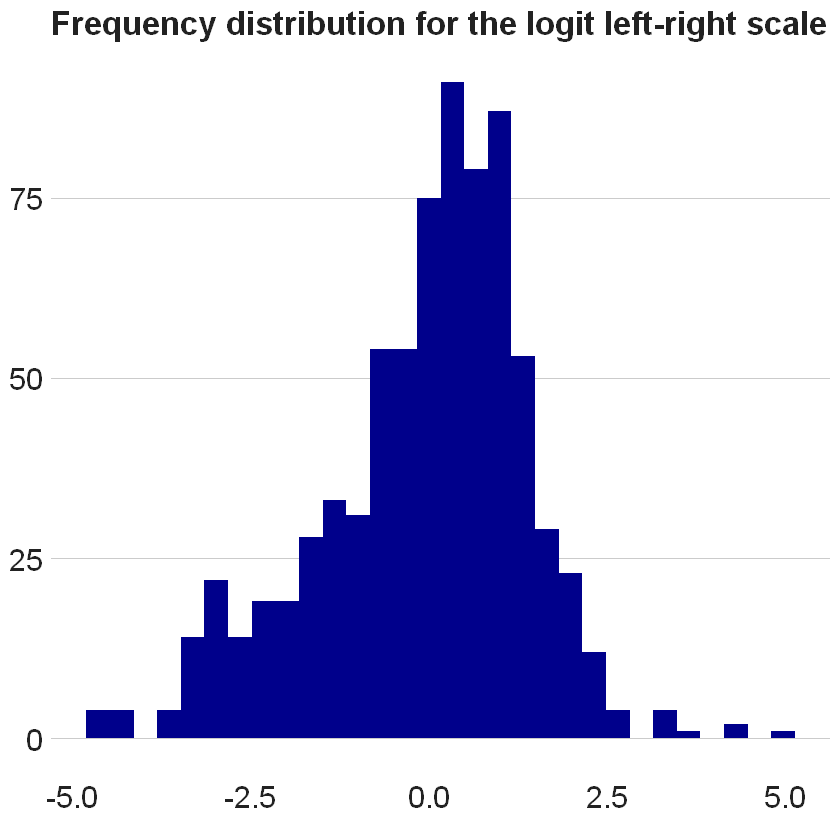

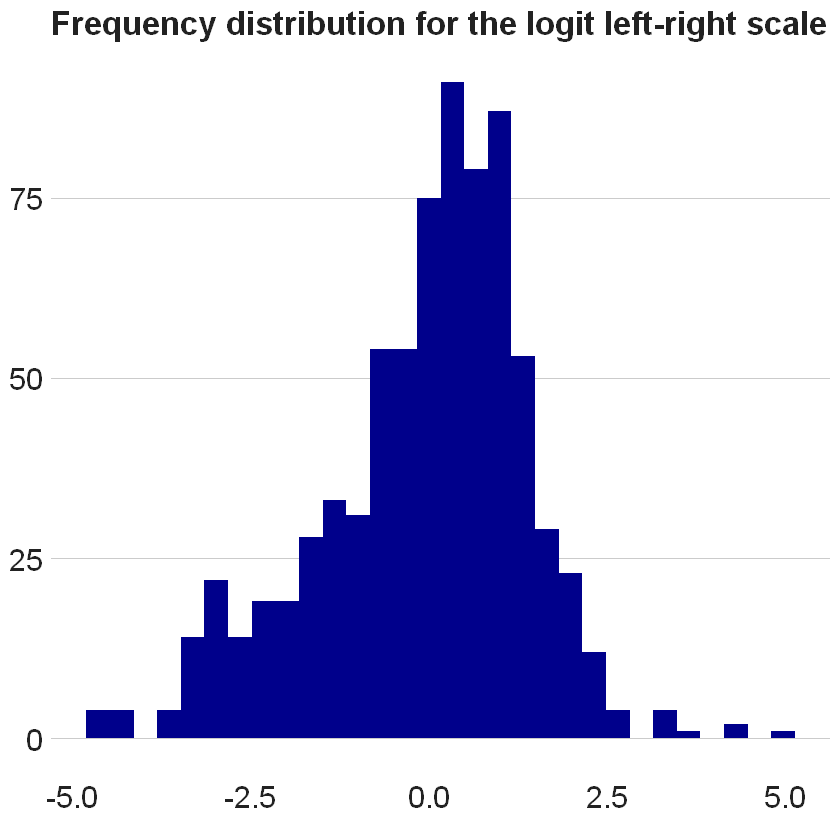

In [7]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark blue") +
bbc_style() +
labs(title = "Frequency distribution for the logit left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows fon

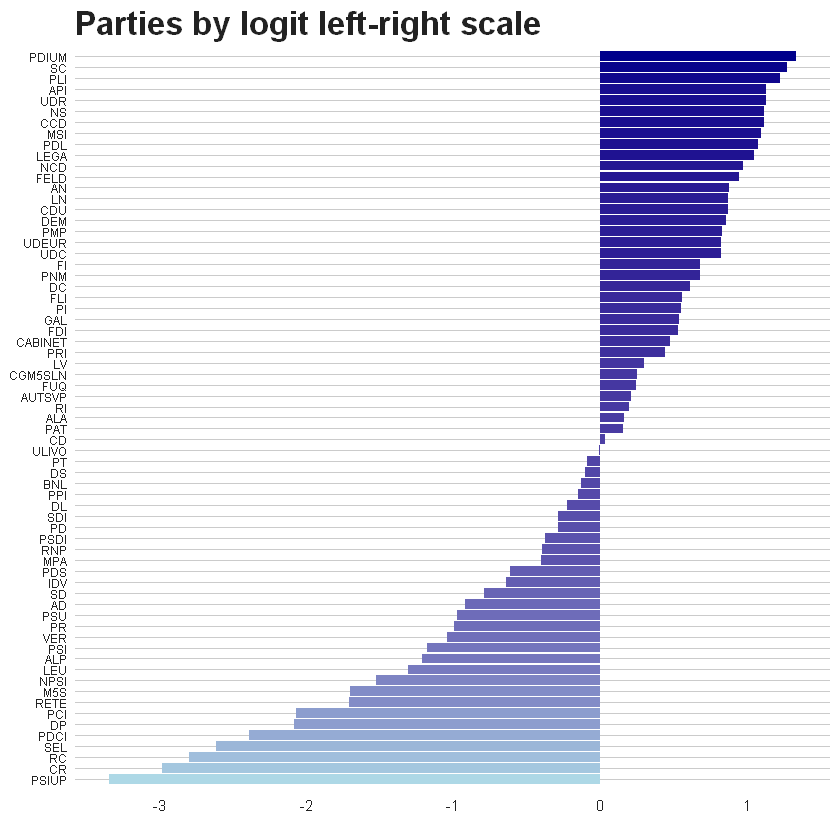

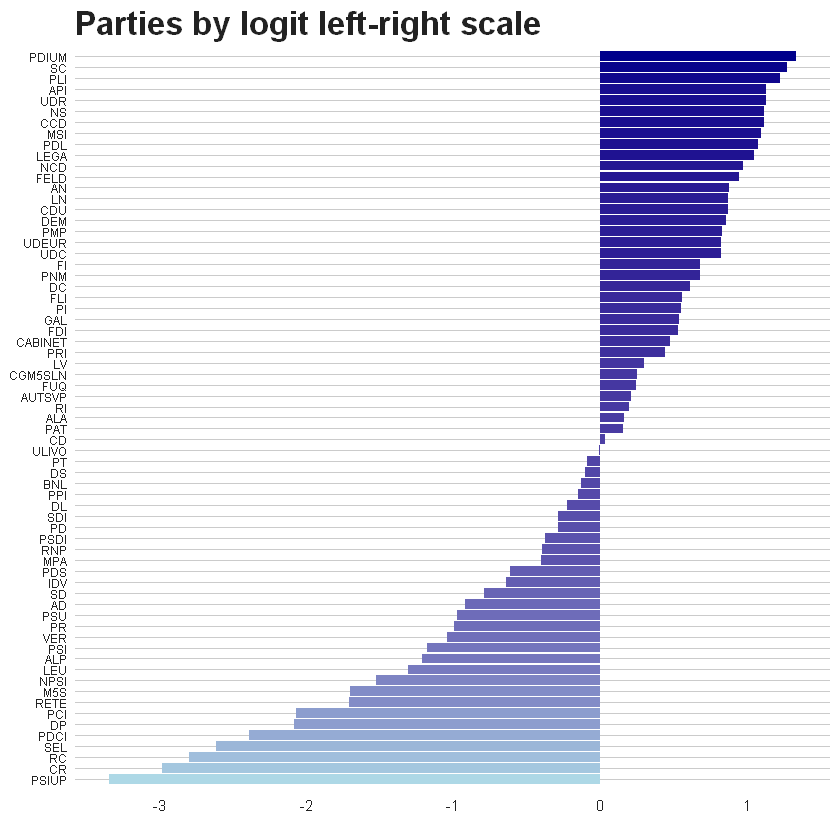

In [8]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_left_right = mean(logit_left_right)) %>% 
arrange(desc(avg_logit_left_right)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_left_right), y = avg_logit_left_right, fill = avg_logit_left_right)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light blue", high = "dark blue") +
labs(title = "Parties by logit left-right scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none")

### Logit by economic left-right scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y

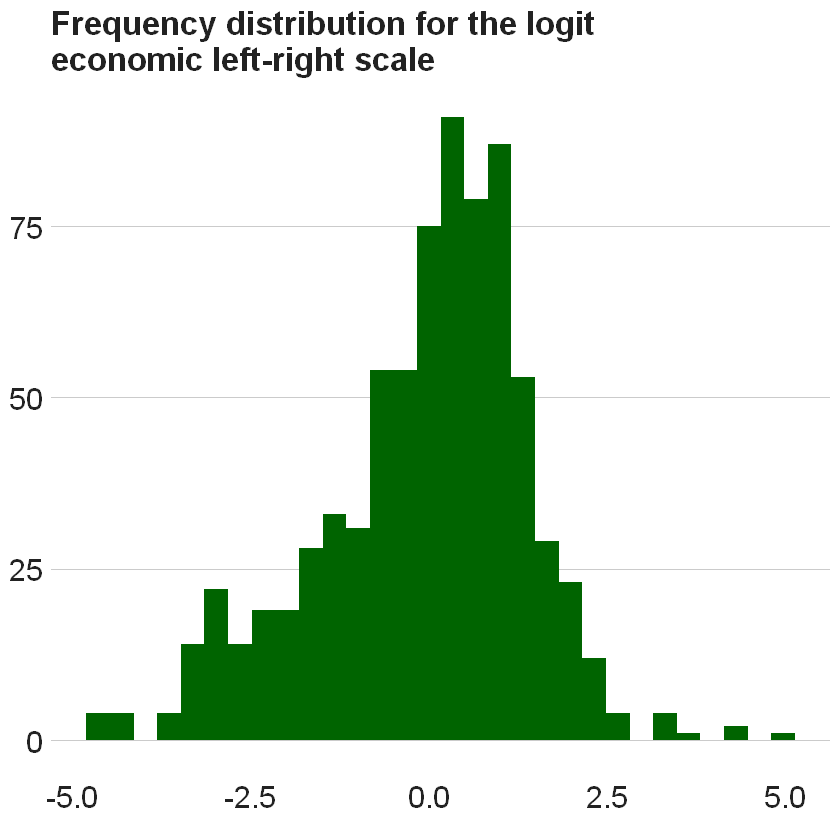

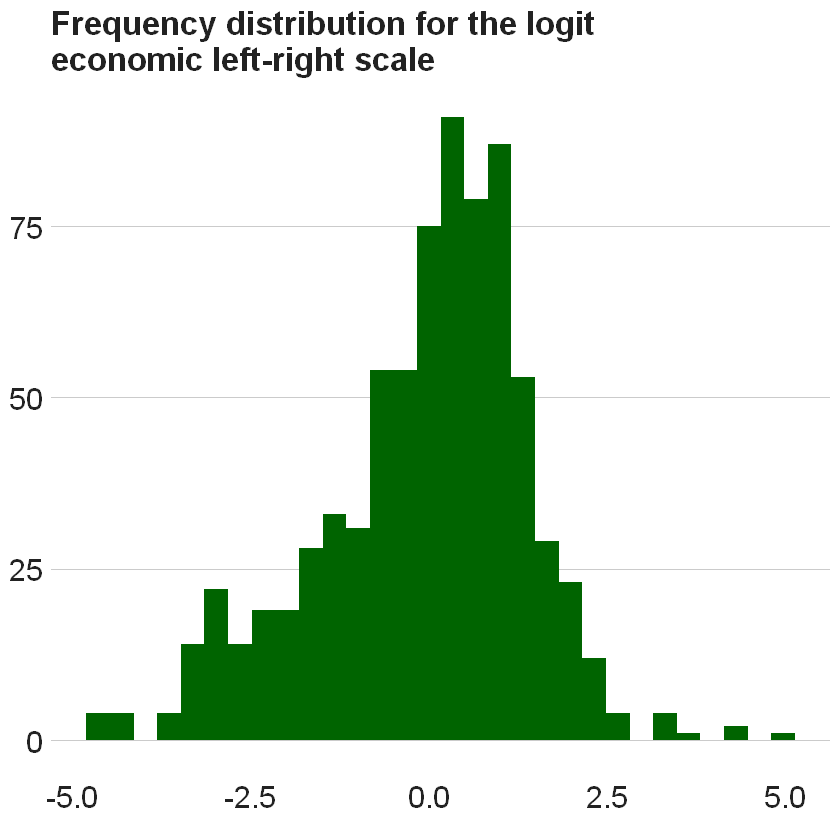

In [9]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark green") +
bbc_style() +
labs(title = "Frequency distribution for the logit \neconomic left-right scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

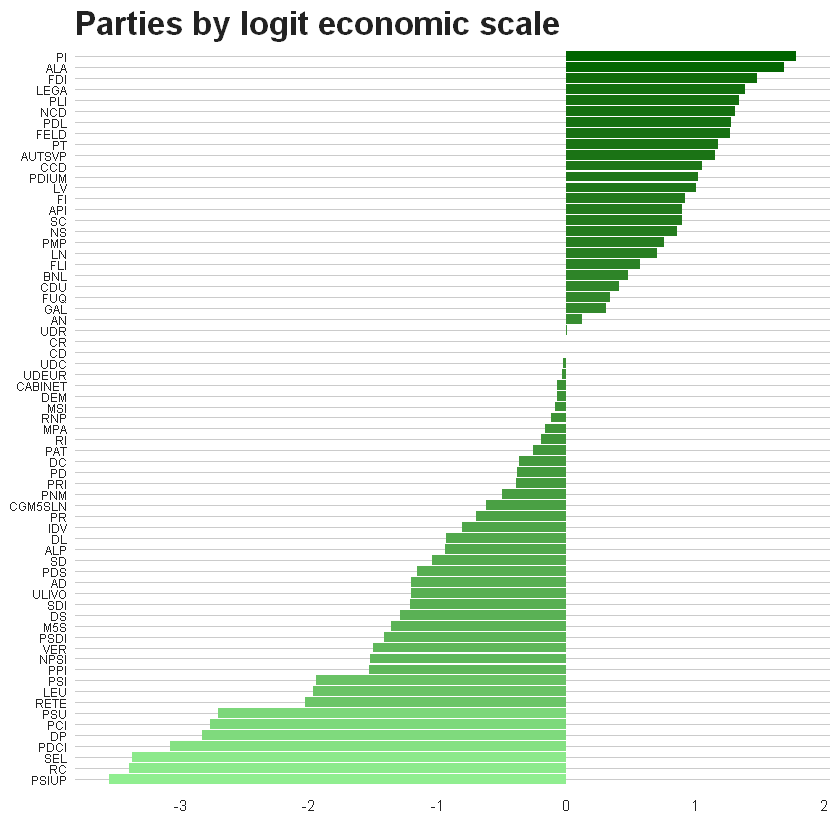

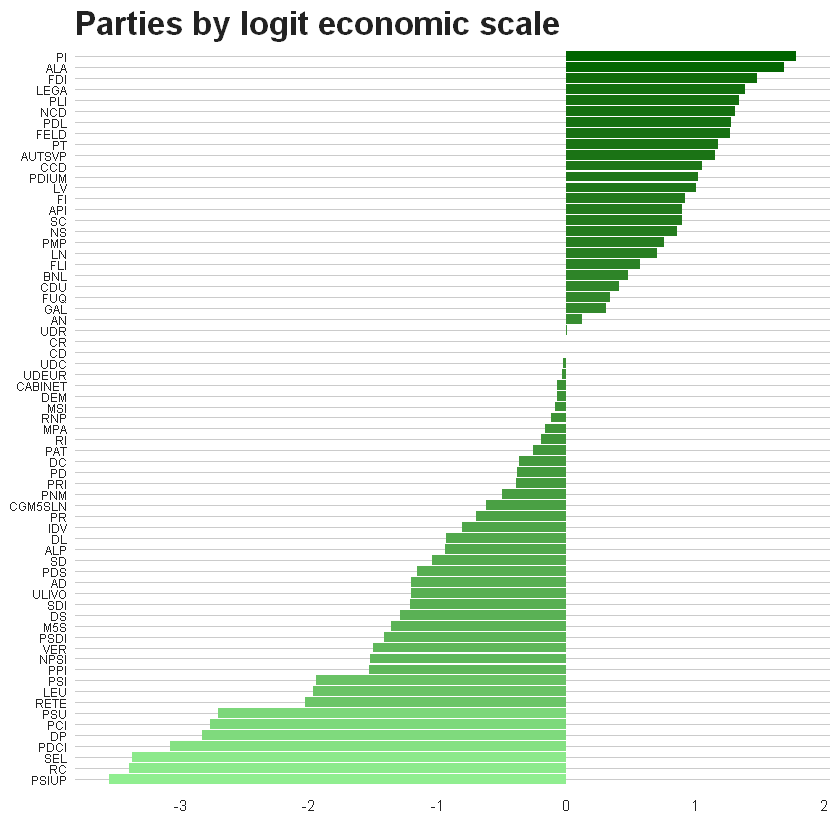

In [10]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_economic = mean(logit_economic)) %>% 
arrange(desc(avg_logit_economic)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_economic), y = avg_logit_economic, fill = avg_logit_economic)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light green", high = "dark green") +
labs(title = "Parties by logit economic scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y

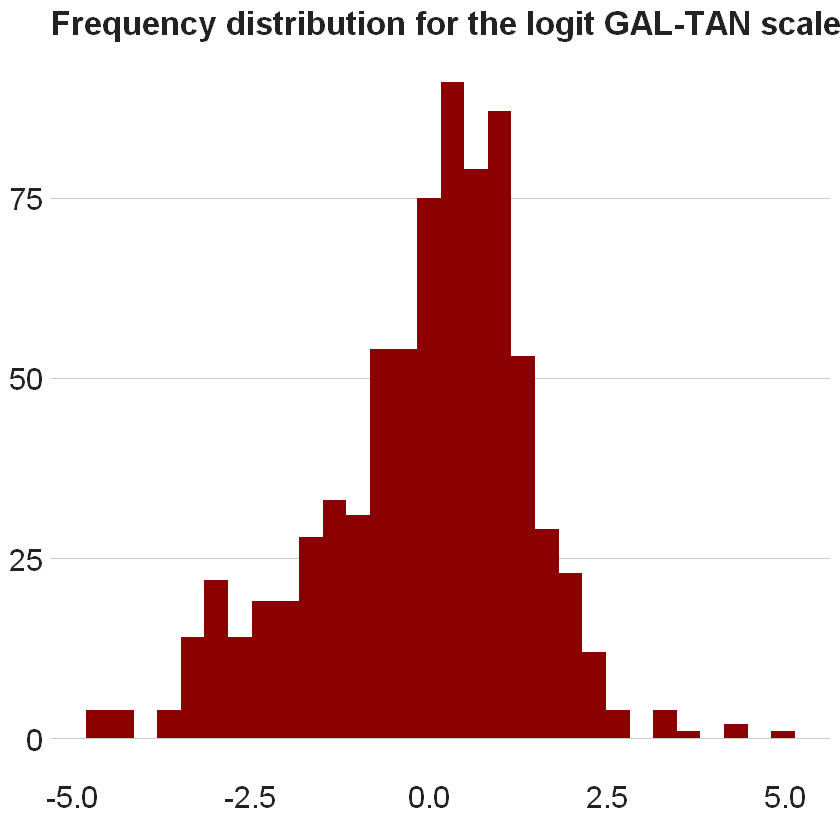

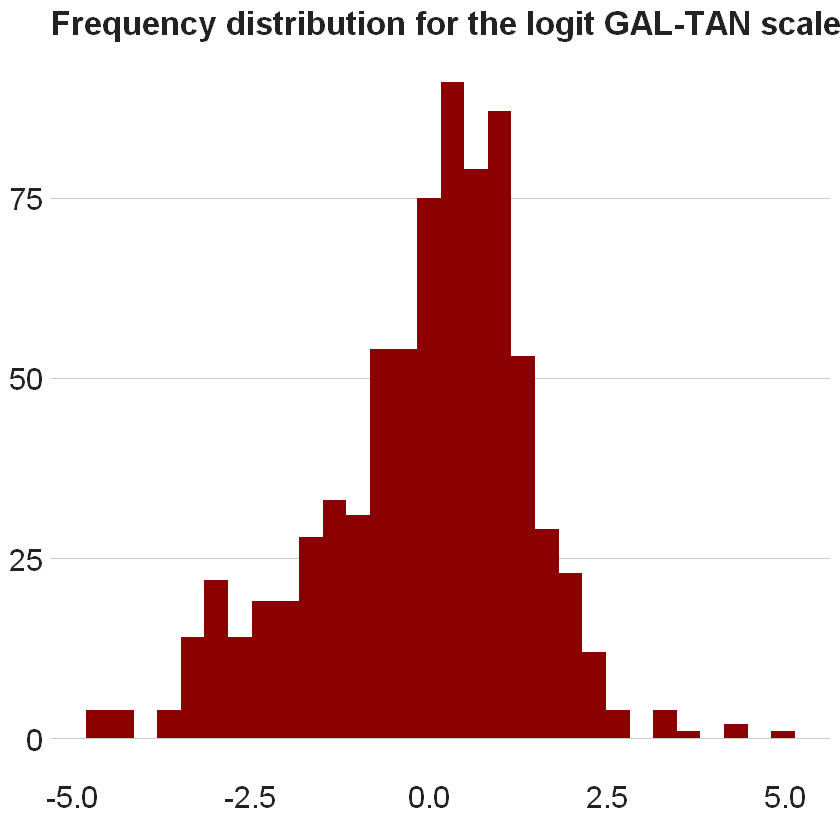

In [11]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark red") +
bbc_style() +
labs(title = "Frequency distribution for the logit GAL-TAN scale") +
theme(plot.title = element_text(size = 20))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

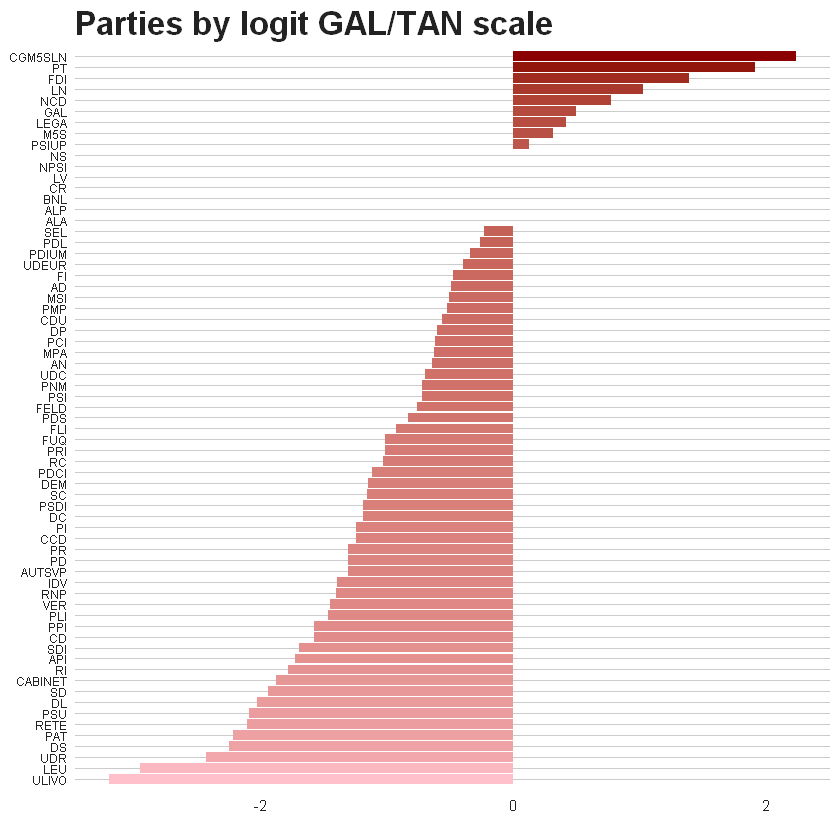

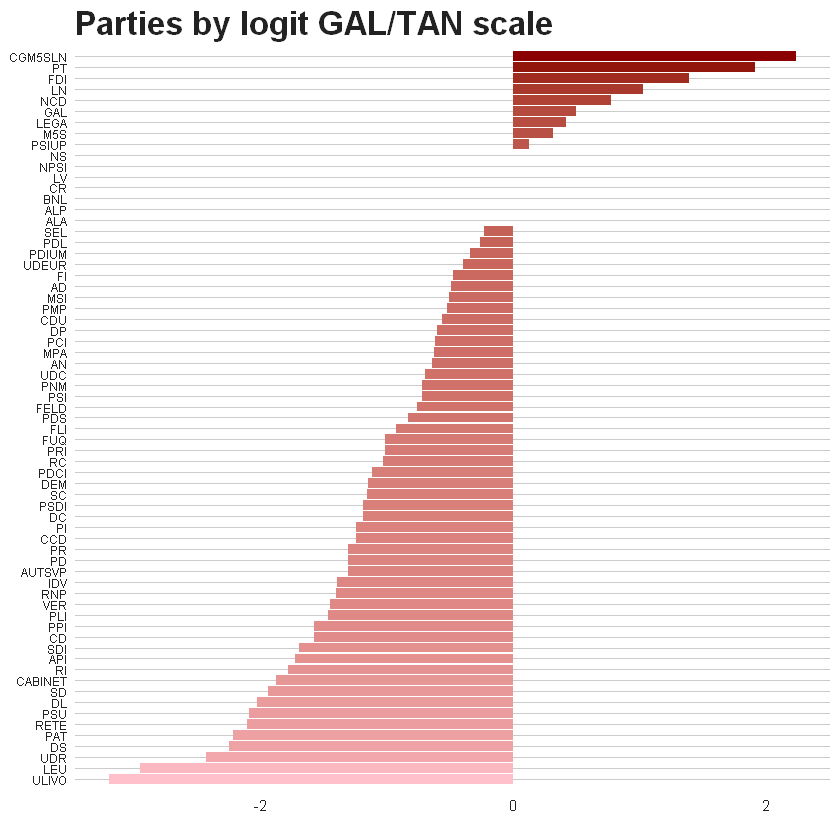

In [12]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "pink", high = "dark red") +
labs(title = "Parties by logit GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

### Logit economic GAL/TAN scale

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y

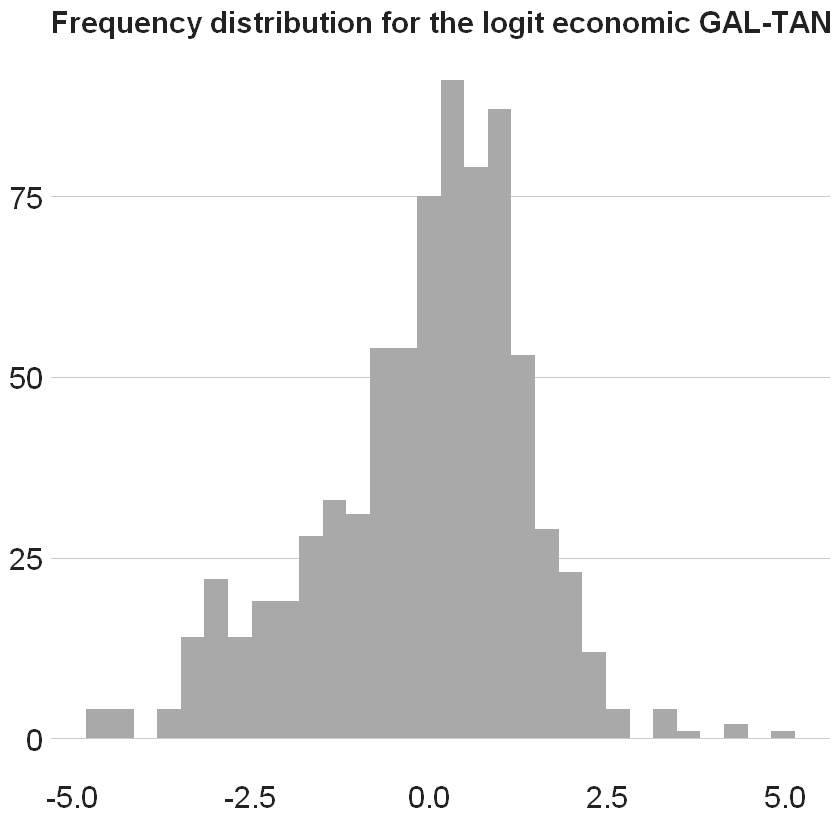

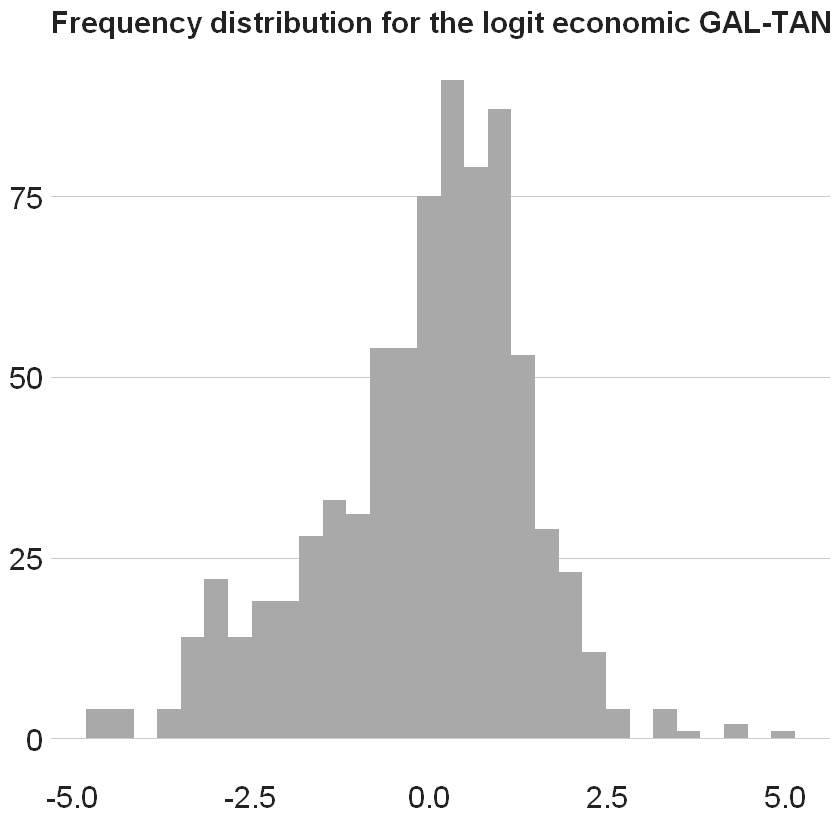

In [13]:
ilsd %>% 
ggplot(aes(logit_left_right)) +
geom_histogram(fill = "dark grey") +
bbc_style() +
labs(title = "Frequency distribution for the logit economic GAL-TAN scale") +
theme(plot.title = element_text(size = 18))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

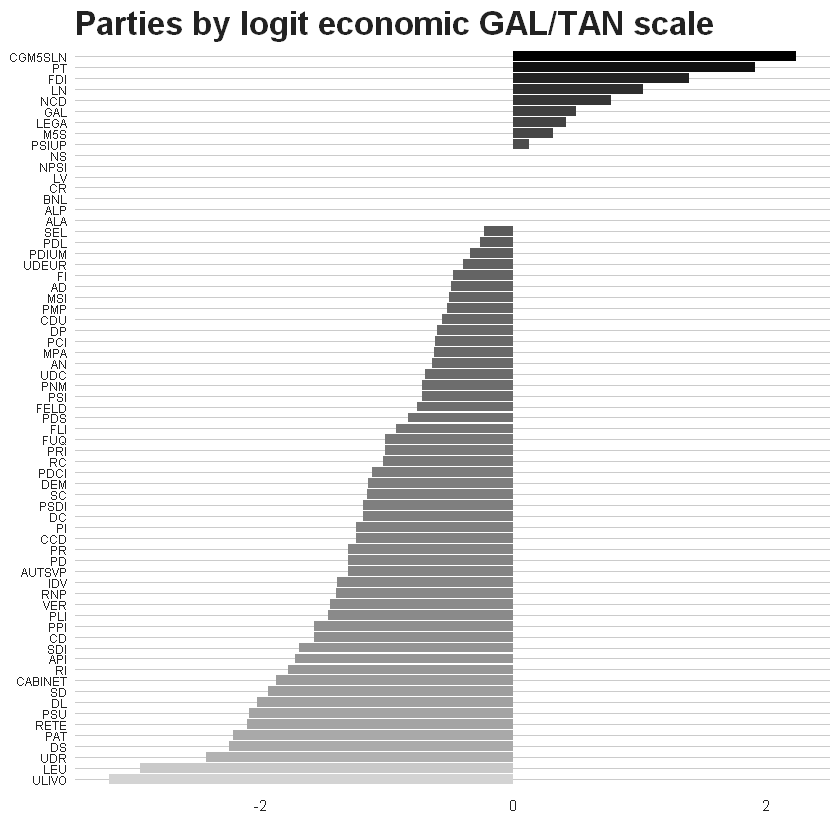

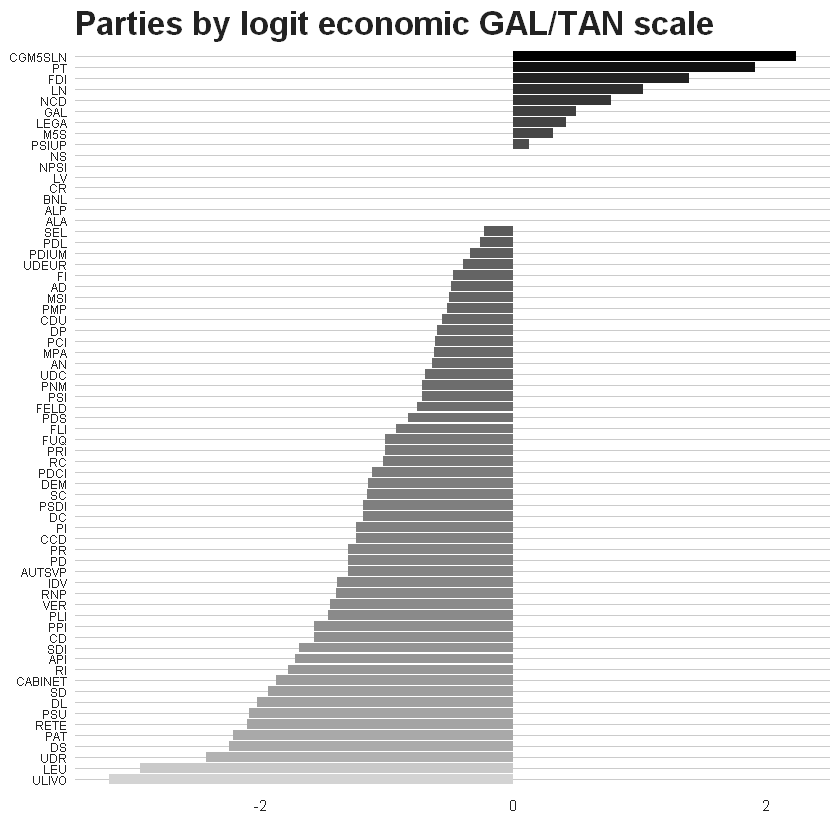

In [14]:
ilsd %>% 
group_by(PARTY) %>% 
summarize(avg_logit_gal_tan = mean(logit_gal_tan)) %>% 
arrange(desc(avg_logit_gal_tan)) %>% 
ggplot(aes(x = fct_reorder(PARTY, avg_logit_gal_tan), y = avg_logit_gal_tan, fill = avg_logit_gal_tan)) +
geom_col() +
coord_flip() +
bbc_style() +
scale_fill_gradient(low = "light gray", high = "black") +
labs(title = "Parties by logit economic GAL/TAN scale") +
theme(plot.title = element_text(size = 20),
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_text(size = 9),
      axis.text.y = element_text(size = 7),
      legend.position = "none") 

# Joining the ILSD dataset to the speeches dataset

Load the speeches dataset

In [15]:
load("data/parliamentary_groups2.rds")
texts <- Texts %>% as_tibble()

The ILSD dataset includes the Constituent Assembly which is coded as Legislature n. 1. Let's subtract one from the "Legislature" column

In [16]:
ilsd <- ilsd %>% 
mutate(Legislature_RECODED = Legislature - 1)

The following tibble shows all the parties in the ILSD dataset, their full name (as reported in the codebook), the corresponding party label in the speeches dataset and the legislatures they appear in.

In [19]:
ilsd %>% filter(PARTY == "VER") %>% distinct(Legislature_RECODED)

Legislature_RECODED
<dbl>
10
11
12
13
14
15


Legislature_RECODED
<dbl>
10
11
12
13
14
15


In [21]:
parties <- tribble(
~party, ~full_name, ~gruppoP, ~gruppoP_recoded, ~legislatures, ~notes,
"AD", "Alleanza Democratica", "PROGR-F", "PROGR-F", "12", "In coalition with 'Alleanza dei Progressisti (PROGR-F)'",
"ALA", "Alleanza Liberalpopolare - Autonomie", NA, NA, "17", "Part of the Mixed Group; in 2016 it became part of 'NCI-SCPI-MAIE'",
"ALP", "Alternativa Libera-Possibile", "SI-SEL-POS-LU", "SI-SEL-POS-LU", "17", "",
"AN", "Alleanza Nazionale", "AN", "AN", "12-15", "",
"API", "Alleanza per l'Italia", "UDCPTP", "UDCPTP", "16", "",
"AUTSVP", "Sudtiroler Volkspartei", NA, NA, "18", "Part of Per le autonomie",
"BNL", "Blocco Nazionale della Libertà", NA, NA , "0", "Our dataset does not include the Constituent Assembly",
"CCD", "Centro Cristiano Democratico", "CCD; CCD-CDU", "UDC", "12-14", "",
"CD", "Centro Democratico", "DES-CD", "DES-CD", "17", "",
"CDU","Cristiani Democratici Uniti", "CCD", "UDC" , "13", "",
"CGM5SLN", "SintesiContrattoGovM5SLN", NA, NA, "18", "",
"CR", "Conservatori e Riformisti", NA, NA, "17", "Part of FI, then it exited it and it was disbanded in 2017",
"DC", "Democrazia Cristiana", "DC; DC-PPI", "DC", "0-11", "",
"DEM", "I Democratici", "DEM-U", "DEM-U", "13", "",
"DL", "Democrazia è Libertà/La Margherita", "MARGH-U", "MARGH-U", "14", "",
"DP", "Democrazia Proletaria", "DP; DP-COM", "DP", "7-10", "",
"DS", "Democratici di Sinistra", "DS-ULIVO; DS-U", "PD-ULIVO", "13-14", "",
"FDI", "Fratelli d'Italia", "FDI-AN; FDI", "FDI", "17-18", "",
"FELD", "Federalisti", "FLD", "FLD", "12", "",
"FI", "Forza Italia", "F-ITA; FI-PDL; FI", "FI-PDL", "12-18", "",
"FLI", "Futuro e Libertà per l’Italia", "FLPTP", "FLPTP", "16", "",
"FUQ", "Fronte dell'Uomo Qualunque", NA, NA, "0", "Our dataset does not include the Constituent Assembly",
"GAL", "Grandi Autonomie e Libertà", NA, NA, "17", "Can't be found in texts; in 2017 it became part of the UDC",
"IDV", "Italia dei Valori", "IDV", "IDV", "15-16", "",
"LEGA", "LEGA", "LNP", "LEGA", "16", "",
"LEU", "Liberi e Uguali" , "LEU", "LEU" , "18", "",
"LN", "Lega Nord", "LEGA; LEGA-N; LEGA-NORD-P; LNA; LNP; LNFP", "LEGA", "10-18", "",
"LV", "Liga Veneta", NA, NA, "9", "Today it's part of Lega, but it is absent in texts for the 9th legislature",
"M5S", "Movimento 5 stelle", "M5S", "M5S", "17-18", "",
"MPA", "Movimento per le Autonomie", NA, NA, "16", "Part of the right-wing government coalition",
"MSI", "Movimento Sociale Italiano", "MSI-DN; MSI", "MSI", "1-11", "",
"NCD", "Nuovo Centro Destra", "AP-CPE-NCD-NCI", "AP-CPE-NCD-NCI", "17", "",
"NPSI", "Nuovo Partito Socialista Italiano", NA, NA, "14", "texts includes DCA-NPSI. However, there's no match for the 14th legislature",
"NS", "Noi Sud", "NOI SUD-LIBERTA\' ED AUTONOMIA/POPOLARI D\'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA\' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "NOI SUD-LIBERTA\' ED AUTONOMIA/POPOLARI D\'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA\' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "16", "",
"PAT", "Patto Segni", NA, NA, "12", "Absent in texts",
"PCI", "Partito Comunista Italiano", "PCI", "PCI", "0-10", "",
"PD", "Partito Democratico", "PD-U; PD", "PD-ULIVO", "15-18", "",
"PDCI", "Partito dei Comunisti Italiani", "COM/IT/", "COM/IT/", "13-15", "",
"PDIUM", "Partito Democratico Italiano di Unità Monarchica", "PDIUM", "PDIUM", "3-5", "",
"PDL", "Popolo Delle Libertà", "PDL; FI-PDL", "FI-PDL", "16-17", "",
"PDS", "Partito Democratico della Sinistra", "PDS", "PDS", "10-13", "",
"PI", "Per l'Italia", "DES-CD", "DES-CD", "17", "",
"PLI", "Partito Liberale Italiano", "PLI", "PLI", "0-11", "",
"PMP", "Partito Monarchico Popolare", "PMP", "PMP", "2-3", "",
"PNM", "Partito Nazionale Monarchico", "PNM", "PNM", "1-3", "",
"PPI", "Partito Popolare Italiano", "PPI", "PPI", "12-13", "",
"PR", "Partito Radicale", "RADICALE", "RADICALE", "7-11", "",
"PRI", "Partito Repubblicano Italiano", "PRI", "PRI", "0-11", "",
"PSDI", "Partito Socialista Democratico Italiano", "PSI-PSDI; PSI", "PSDI", "0-11", "",
"PSI", "Partito Socialista Italiano", "PSI-PSDI; PSI", "PSI", "0-12", "",
"PSIUP", "Partito Socialista di Unità Proletaria", "PSIUP", "PSIUP", "4-5", "",
"PSU", "Partito Socialista Unitario", NA, NA, "5", "The codebook refers to this party as 'Partito Socialista Unitario, but in fact it's probably 'Partito Socialista Unificato'. Anyway, it's not in texts. However, it could refer to both PSI and PSDI",
"PT", "Popolo e Territorio", "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE", "16", "",
"RC", "Rifondazione Comunista", "RC-PROGR; RC-SE; RC", "RC", "11-15", "",
"RETE", "La Rete", "RETE", "RETE", "11-12", "",
"RI", "Rinnovamento Italiano",  "RINN/IT", "RINN/IT", "13", "", 
"RNP", "Rosa Nel Pugno", "SOCRAD-RNP", "SOCRAD-RNP", "15", "",
"SC", "Scelta Civica", "NCI-SCPI-MAIE", "NCI-SCPI-MAIE", "17", "", 
"SD", "Sinistra Democratica", "COM/IT/; RC-SE", NA, "15", "Mostly MPs from DS who did not join PD. It unified several left-wing parties",
"SDI", "Socialisti Democratici Italiani", NA, NA, "13-14", "It was the direct continuation of the Italian Socialists",
"SEL", "Sinistra Ecologia e Libertà", "SI-SEL-POS-LU", "SI-SEL-POS-LU", "17", "",
"UDC", "Unione dei Democratici Cristiani", "UNIONE DEI DEMOCRATICI CRISTIANI E DEI DEMOCRATICI DI CENTRO; CCD; CCD-CDU; UDCPTP", "UDC", "14-17", "",
"UDEUR", "Unione Democratici per l'Europa", "UDEUR", "UDEUR", "13-15", "", 
"UDR", "Unione Democratica per la Repubblica", "UDR", "UDR", "13", "",
"ULIVO", "Ulivo", "PD-U", "PD-ULIVO", "15", "",
"VER", "Verdi", "VERDE; VERDI", "VERDI", "10-15", "")

writexl::write_xlsx(x = parties, "data/ilsd_parties.xlsx")

Recode the 'gruppoP' variable in the speeches dataset by grouping together labels belonging to the same party. This will simplify the merging of the two datasets

In [22]:
texts <- texts %>% 
mutate(gruppoP_recoded = case_when(
gruppoP %in% c('CCD', 'CCD-CDU', 'UNIONE DEI DEMOCRATICI CRISTIANI E DEI DEMOCRATICI DI CENTRO', 'UDCPTP')  ~ 'UDC',
gruppoP == 'COMUNISTA' ~ 'RC',
gruppoP == 'DC-PPI' ~ 'DC',
gruppoP == 'DP-COM' ~ 'DP',
gruppoP == 'FDI-AN' ~ 'FDI',
gruppoP %in% c('F-ITA', 'FI', 'PDL') ~ 'FI-PDL',
gruppoP == 'GC-PDS' ~ "PDS",
gruppoP %in% c('LEGA-N', 'LEGA-NORD-P', 'LNA', 'LNFP', 'LNP') ~ 'LEGA',
gruppoP == 'MSI-DN' ~ "MSI",
gruppoP %in% c('DS-U', 'PD-U', 'PD-ULIVO', 'PD', 'DS-ULIVO') ~ 'PD-ULIVO',
gruppoP == 'PDUP-DP' ~ 'DP',
gruppoP == 'POP-UDEUR' ~ 'UDEUR',
gruppoP == 'PSI-PSDI' ~ "PSI",
gruppoP %in% c('RC-PROGR', 'RC-SE') ~ 'RC',
gruppoP == 'SI' ~ 'SI-SEL-POS-LU',
gruppoP == 'VERDE' ~ 'VERDI',
TRUE ~ gruppoP))

The following are the parties in the ILSD dataset that I couldn't identify in the speeches dataset

In [24]:
parties %>% 
filter(is.na(gruppoP))

party,full_name,gruppoP,gruppoP_recoded,legislatures,notes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALA,Alleanza Liberalpopolare - Autonomie,NA,NA,17,Part of the Mixed Group; in 2016 it became part of 'NCI-SCPI-MAIE'
AUTSVP,Sudtiroler Volkspartei,NA,NA,18,Part of Per le autonomie
BNL,Blocco Nazionale della Libertà,NA,NA,0,Our dataset does not include the Constituent Assembly
CGM5SLN,SintesiContrattoGovM5SLN,NA,NA,18,
CR,Conservatori e Riformisti,NA,NA,17,"Part of FI, then it exited it and it was disbanded in 2017"
FUQ,Fronte dell'Uomo Qualunque,NA,NA,0,Our dataset does not include the Constituent Assembly
GAL,Grandi Autonomie e Libertà,NA,NA,17,Can't be found in texts; in 2017 it became part of the UDC
LV,Liga Veneta,NA,NA,9,"Today it's part of Lega, but it is absent in texts for the 9th legislature"
MPA,Movimento per le Autonomie,NA,NA,16,Part of the right-wing government coalition


party,full_name,gruppoP,gruppoP_recoded,legislatures,notes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALA,Alleanza Liberalpopolare - Autonomie,NA,NA,17,Part of the Mixed Group; in 2016 it became part of 'NCI-SCPI-MAIE'
AUTSVP,Sudtiroler Volkspartei,NA,NA,18,Part of Per le autonomie
BNL,Blocco Nazionale della Libertà,NA,NA,0,Our dataset does not include the Constituent Assembly
CGM5SLN,SintesiContrattoGovM5SLN,NA,NA,18,
CR,Conservatori e Riformisti,NA,NA,17,"Part of FI, then it exited it and it was disbanded in 2017"
FUQ,Fronte dell'Uomo Qualunque,NA,NA,0,Our dataset does not include the Constituent Assembly
GAL,Grandi Autonomie e Libertà,NA,NA,17,Can't be found in texts; in 2017 it became part of the UDC
LV,Liga Veneta,NA,NA,9,"Today it's part of Lega, but it is absent in texts for the 9th legislature"
MPA,Movimento per le Autonomie,NA,NA,16,Part of the right-wing government coalition


Recode the 'PARTY' variable from the ILSD dataset to make the party labels identical to the ones in the speeches dataset

In [25]:
ilsd <- ilsd %>% 
mutate(PARTY_RECODED = case_when(
PARTY == "AD" ~ "PROGR-F",
PARTY == "ALP" ~ 'SI-SEL-POS-LU',
PARTY == "API" ~ "UDCPTP",
PARTY == "CCD" ~ 'UDC',
PARTY == "CD" ~ "DES-CD",
PARTY == "CDU" ~ "UDC",
PARTY == "DEM" ~ "DEM-U",
PARTY == "DL" ~ "MARGH-U",
PARTY == "DS" ~ "PD-ULIVO",
PARTY == "FELD" ~ "FLD",
PARTY == "FI" ~ "FI-PDL",
PARTY == "FLI" ~ "FLPTP",
PARTY == "LN" ~ "LEGA",
PARTY == "NCD" ~ "AP-CPE-NCD-NCI",
PARTY == "NS" ~ "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE",
PARTY == "PD" ~ "PD-ULIVO",
PARTY == "PDCI" ~ "COM/IT/",
PARTY == "PDL" ~ "FI-PDL",
PARTY == "PI" ~ "DES-CD",
PARTY == "PR" ~ "RADICALE",
PARTY == "PT" ~ "NOI SUD-LIBERTA' ED AUTONOMIA/POPOLARI D'ITALIA DOMANI-PID/MOVIMENTO DI RESPONSABILITA' NAZIONALE-MRN/AZIONE POPOLARE/ALLEANZA DI CENTRO-ADC/INTESA POPOLARE",
PARTY == "RI" ~ "RINN/IT",
PARTY == "RNP" ~ "SOCRAD-RNP",
PARTY == "SC" ~ "NCI-SCPI-MAIE",
PARTY == "SD" ~ "RC",
PARTY == "SEL" ~ "SI-SEL-POS-LU",
PARTY == "ULIVO" ~ "PD-ULIVO",
PARTY == "VER" ~ "VERDI",
TRUE ~ PARTY
)) 

Extract the year from the 'Edate' variable with a regex

In [26]:
ilsd <- ilsd %>% 
mutate(Year = as.integer(str_extract(string = Edate, pattern = "\\d{4}")))

Parties often have more than one row for each party-legislature-year combination. Let's compute the mean for each of the variables we want to merge in the speeches dataset.

In [27]:
ilsd <- ilsd %>% 
group_by(PARTY_RECODED, Legislature_RECODED, Year) %>% 
mutate(
    across(.cols = c("left_right", "ratio_leftright", "logit_left_right", "classic_economic", "ratio_economic", 
                     "logit_economic", "classic_gal_tan", "ratio_gal_tan", "logit_gal_tan", "classic_economic_gal_tan", 
                     "ratio_economic_gal_tan", "logit_economic_gal_tan", "gal_tan_controllo"),
           .fns = ~ mean(., na.rm = TRUE)))

Left join the ILSD dataset to our speeches dataset

In [28]:
texts <- texts %>% 
left_join(ilsd, by = c("gruppoP_recoded" = "PARTY_RECODED", "legislature" = "Legislature_RECODED", "year" = "Year"))

The ILSD dataset contains fewer years compared to 'texts'. This generated a large number of null values in the joined dataset. 

In [29]:
map_dfr(texts, ~ sum(is.na(.)) / length(.)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, classic_gal_tan,
      ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan, gal_tan_controllo)

left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3702111,0.3702111,0.3702111,0.3702111,0.3752827,0.3702111,0.3702111,0.4698747,0.3702111,0.3702111,0.4527542,0.3702111,0.3702111


left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3702111,0.3702111,0.3702111,0.3702111,0.3752827,0.3702111,0.3702111,0.4698747,0.3702111,0.3702111,0.4527542,0.3702111,0.3702111


Let's fill those values by using the previous year as reference.

In [30]:
texts <- texts %>% 
arrange(year) %>% 
group_by(gruppoP_recoded, legislature) %>% 
fill_(fill_cols = c("left_right", "ratio_leftright", "logit_left_right", "classic_economic", "ratio_economic", 
                    "logit_economic", "classic_gal_tan", "ratio_gal_tan", "logit_gal_tan", "classic_economic_gal_tan", 
                    "ratio_economic_gal_tan", "logit_economic_gal_tan", "gal_tan_controllo"),
       .direction = "down")

The % of null values went down from 37% to 9%

In [31]:
map_dfr(texts, ~ sum(is.na(.)) / length(.)) %>% 
select(left_right, ratio_leftright, logit_left_right, classic_economic, ratio_economic, logit_economic, classic_gal_tan,
      ratio_gal_tan, logit_gal_tan, classic_economic_gal_tan, ratio_economic_gal_tan, logit_economic_gal_tan, gal_tan_controllo)

left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.09363047,0.09363047,0.09363047,0.09363047,0.09900068,0.09363047,0.09363047,0.20596,0.09363047,0.09363047,0.1828721,0.09363047,0.09363047


left_right,ratio_leftright,logit_left_right,classic_economic,ratio_economic,logit_economic,classic_gal_tan,ratio_gal_tan,logit_gal_tan,classic_economic_gal_tan,ratio_economic_gal_tan,logit_economic_gal_tan,gal_tan_controllo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.09363047,0.09363047,0.09363047,0.09363047,0.09900068,0.09363047,0.09363047,0.20596,0.09363047,0.09363047,0.1828721,0.09363047,0.09363047


Saving the joined and transformed dataset as an .rds file

In [32]:
saveRDS(texts, file = "data/joined_texts.rds")